# Motion Detector

Detecting motion in videos using OpenCV, also saving the new video to a file.

In [1]:
#importing necerssary files
import cv2
import numpy as np
import matplotlib.pyplot as plt
#!pip install bokeh
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook
import time

In [2]:
plt.rcParams['figure.figsize'] = [12, 12]

## Original Video
(Video is displayed when notebook runs)

In [3]:
output_notebook()

cap2 = cv2.VideoCapture('./samples/vtest.avi')
ret, frame = cap2.read()
frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=int(frame.shape[1])
height=int(frame.shape[0])
p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p, notebook_handle=True)
while True:
    ret2, frame = cap2.read()
    if not ret2:
        break
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame=cv2.flip(frame, -1)
    myImage.data_source.data['image']=[frame]
    push_notebook()
    time.sleep(0.01)
cap2.release()

Loading BokehJS ...

---

### Still from Original Video

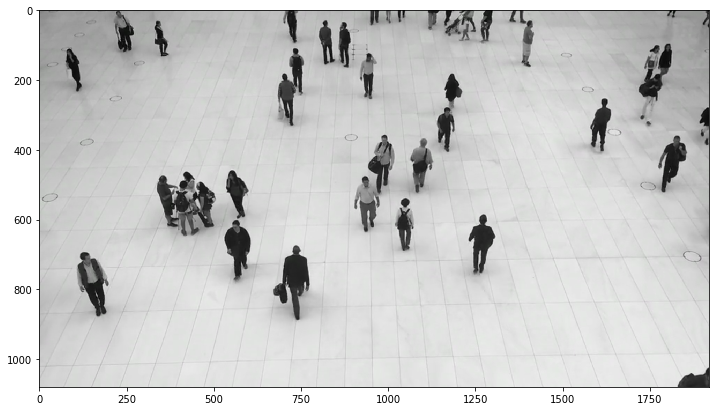

In [4]:
#still from original video
base = cv2.imread('still_original.png', 1)
base_rgb = cv2.cvtColor(base, cv2.COLOR_BGR2RGB)
plt.imshow(base_rgb)

# Detector

In [5]:
cap = cv2.VideoCapture('./samples/vtest.avi')

video_width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
video_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
video_width, video_height = int(video_width), int(video_height)

#encode
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('motion_detection_result.avi', fourcc, 30.0, (video_width,video_height))

ret, frame1 = cap.read()
ret, frame2 = cap.read()

In [6]:
#video conversion
while cap.isOpened():
    diff = cv2.absdiff(frame1, frame2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh, None, iterations=3)
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    #placing rectangles around moving objects
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        if cv2.contourArea(contour) < 500:
            continue
        cv2.rectangle(frame1, (x,y), (x+w, y+h), (0,255,0), 2)

    #new video feed
    cv2.imshow('feed', frame1)
    out.write(frame1)    #saving the video to an avi file
    frame1 = frame2
    ret2, frame2 = cap.read()
        
    
    if cv2.waitKey(1) == ord('q') or not ret2:
        break

In [7]:
    
cap.release()
cv2.destroyAllWindows()

---

# New Video
(Video is displayed when notebook runs)

In [8]:
output_notebook()

cap2 = cv2.VideoCapture('motion_detection_result.avi')
ret, frame = cap2.read()
frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=int(frame.shape[1])
height=int(frame.shape[0])
p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p, notebook_handle=True)
while True:
    ret2, frame = cap2.read()
    if not ret2:
        break
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame=cv2.flip(frame, -1)
    myImage.data_source.data['image']=[frame]
    push_notebook()
    time.sleep(0.01)
cap2.release()

Loading BokehJS ...

### Still from Processed Video

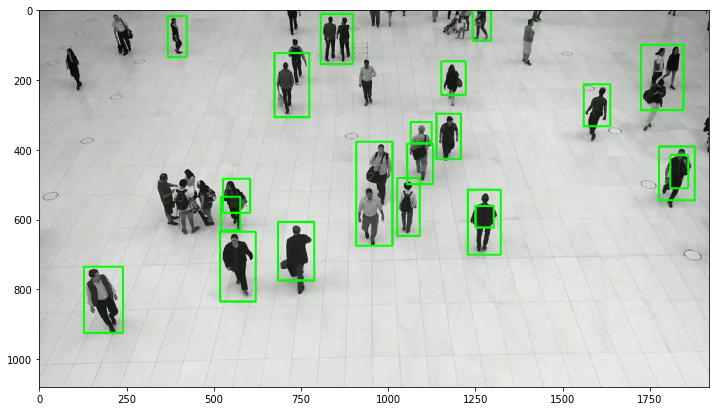

In [9]:
#still from processed video
proc = cv2.imread('still_processed.png', 1)
proc_rgb = cv2.cvtColor(proc, cv2.COLOR_BGR2RGB)
plt.imshow(proc_rgb)